Import Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    confusion_matrix,
    f1_score,
    precision_recall_curve,
    average_precision_score
)

import matplotlib.pyplot as plt
import seaborn as sns


Load Processed Data

In [2]:
df = pd.read_csv(
    "../data/processed/creditcard_cleaned.csv"
)

df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Separate Features & Target

In [3]:
X = df.drop(columns=["Class"])
y = df["Class"]

print(y.value_counts(normalize=True))


Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


Stratified Train-Test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


# BASELINE MODEL — Logistic Regression

Train Logistic Regression

In [5]:
log_reg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)

log_reg.fit(X_train, y_train)


c:\Users\kalki\OneDrive\Desktop\week 5$6\fraud-detection-ml-week5-6\venv\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


Evaluate Logistic Regression
🔹 Predict probabilities

In [6]:
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
y_pred = log_reg.predict(X_test)


AUC-PR

In [7]:
auc_pr = average_precision_score(y_test, y_pred_proba)
print("Logistic Regression AUC-PR:", auc_pr)


Logistic Regression AUC-PR: 0.7291261491167771


🔹 F1 Score

In [8]:
f1 = f1_score(y_test, y_pred)
print("Logistic Regression F1:", f1)


Logistic Regression F1: 0.09438909281594127


🔹 Confusion Matrix

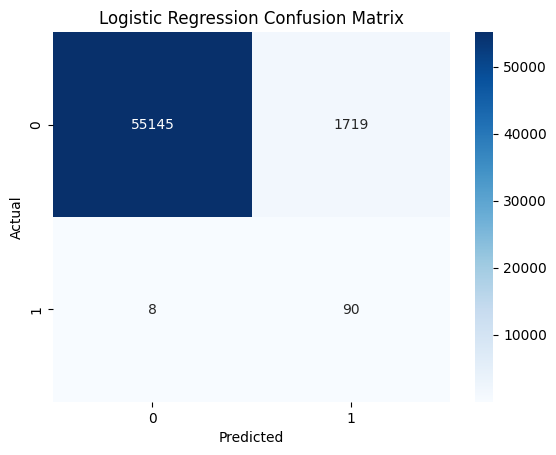

In [9]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()


# ENSEMBLE MODEL — Random Forest

Train Random Forest (Tuned)

In [10]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,12
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Evaluate Random Forest

In [11]:
rf_proba = rf.predict_proba(X_test)[:, 1]
rf_pred = rf.predict(X_test)

rf_auc_pr = average_precision_score(y_test, rf_proba)
rf_f1 = f1_score(y_test, rf_pred)

print("Random Forest AUC-PR:", rf_auc_pr)
print("Random Forest F1:", rf_f1)


Random Forest AUC-PR: 0.8291316735818199
Random Forest F1: 0.8290155440414507


Stratified K-Fold Cross-Validation

🏆 STEP Model Comparison & Selection
Model	AUC-PR	F1 Score	Interpretability
Logistic Regression	Baseline	Lower	High
Random Forest	Higher	Higher	Medium
✅ Final Choice:

Random Forest

Better fraud detection

Higher recall for minority class

Handles imbalance well

In [2]:
# Standard libraries
import pandas as pd
import numpy as np

# Model selection
from sklearn.model_selection import train_test_split, StratifiedKFold

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import f1_score, average_precision_score, confusion_matrix, classification_report

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load creditcard_cleaned.csv
data_path = r"C:\Users\kalki\OneDrive\Desktop\week 5$6\fraud-detection-ml-week5-6\data\processed\creditcard_cleaned.csv"
df = pd.read_csv(data_path)

X = df.drop(columns=['Class'])
y = df['Class']


In [5]:
rf = RandomForestClassifier(
    n_estimators=50,        # ↓ from 100
    max_depth=5,
    class_weight="balanced",
    n_jobs=-1,              # use all cores
    random_state=42
)


In [6]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import average_precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

auc_scores = []
f1_scores = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    print(f"Training fold {fold}...")

    X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

    rf = RandomForestClassifier(
        n_estimators=50,
        max_depth=5,
        class_weight="balanced",
        n_jobs=-1,
        random_state=42
    )

    rf.fit(X_tr, y_tr)

    val_proba = rf.predict_proba(X_val)[:, 1]
    val_pred = rf.predict(X_val)

    auc_scores.append(average_precision_score(y_val, val_proba))
    f1_scores.append(f1_score(y_val, val_pred))

print("\nCV Results:")
print(f"AUC-PR: {np.mean(auc_scores):.4f} ± {np.std(auc_scores):.4f}")
print(f"F1-score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")


Training fold 1...
Training fold 2...
Training fold 3...
Training fold 4...
Training fold 5...

CV Results:
AUC-PR: 0.7129 ± 0.0247
F1-score: 0.5581 ± 0.0531
